In [1]:
import numpy as np

l = np.loadtxt('./data/diabetes.csv', delimiter=',', skiprows=1)

x = l[:, 0:-1]
y = l[:, [-1]]

print(l.shape)
print(x.shape)
print(y.shape)
print(l)

(768, 9)
(768, 8)
(768, 1)
[[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]


In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Flatten(input_shape=(x.shape[1],)))
model.add(Dense(y.shape[1], activation='sigmoid'))
model.compile(optimizer=SGD(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 8)                 0         
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [3]:
training = model.fit(x, y, epochs=100, validation_split=0.2, verbose=0)

In [4]:
model.evaluate(x, y)

24/24 [==============================] - 0s 2ms/step - loss: 0.5977 - accuracy: 0.6849


[0.5977120995521545, 0.6848958134651184]

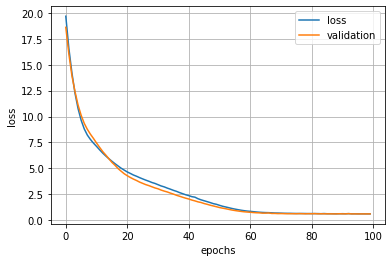

In [5]:
import matplotlib.pyplot as plt

plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(training.history['loss'], label='loss')
plt.plot(training.history['val_loss'], label='validation')
plt.legend(loc='best')

plt.show()

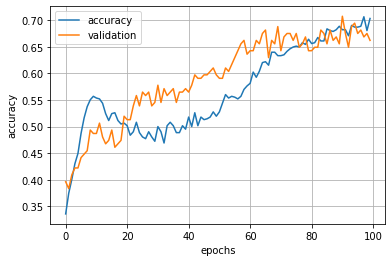

In [6]:
import matplotlib.pyplot as plt

plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(training.history['accuracy'], label='accuracy')
plt.plot(training.history['val_accuracy'], label='validation')
plt.legend(loc='best')

plt.show()